Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091
0.9866710547967747
{'C': 1.0, 'gamma': 0.001}
RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


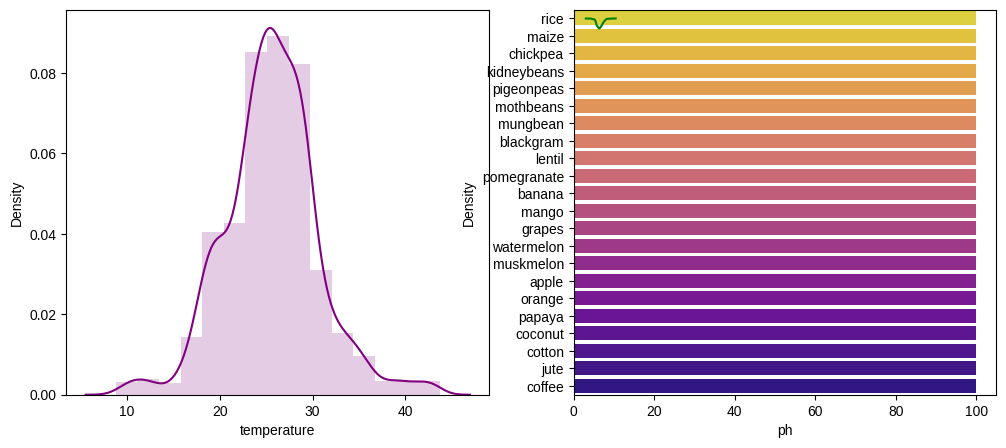

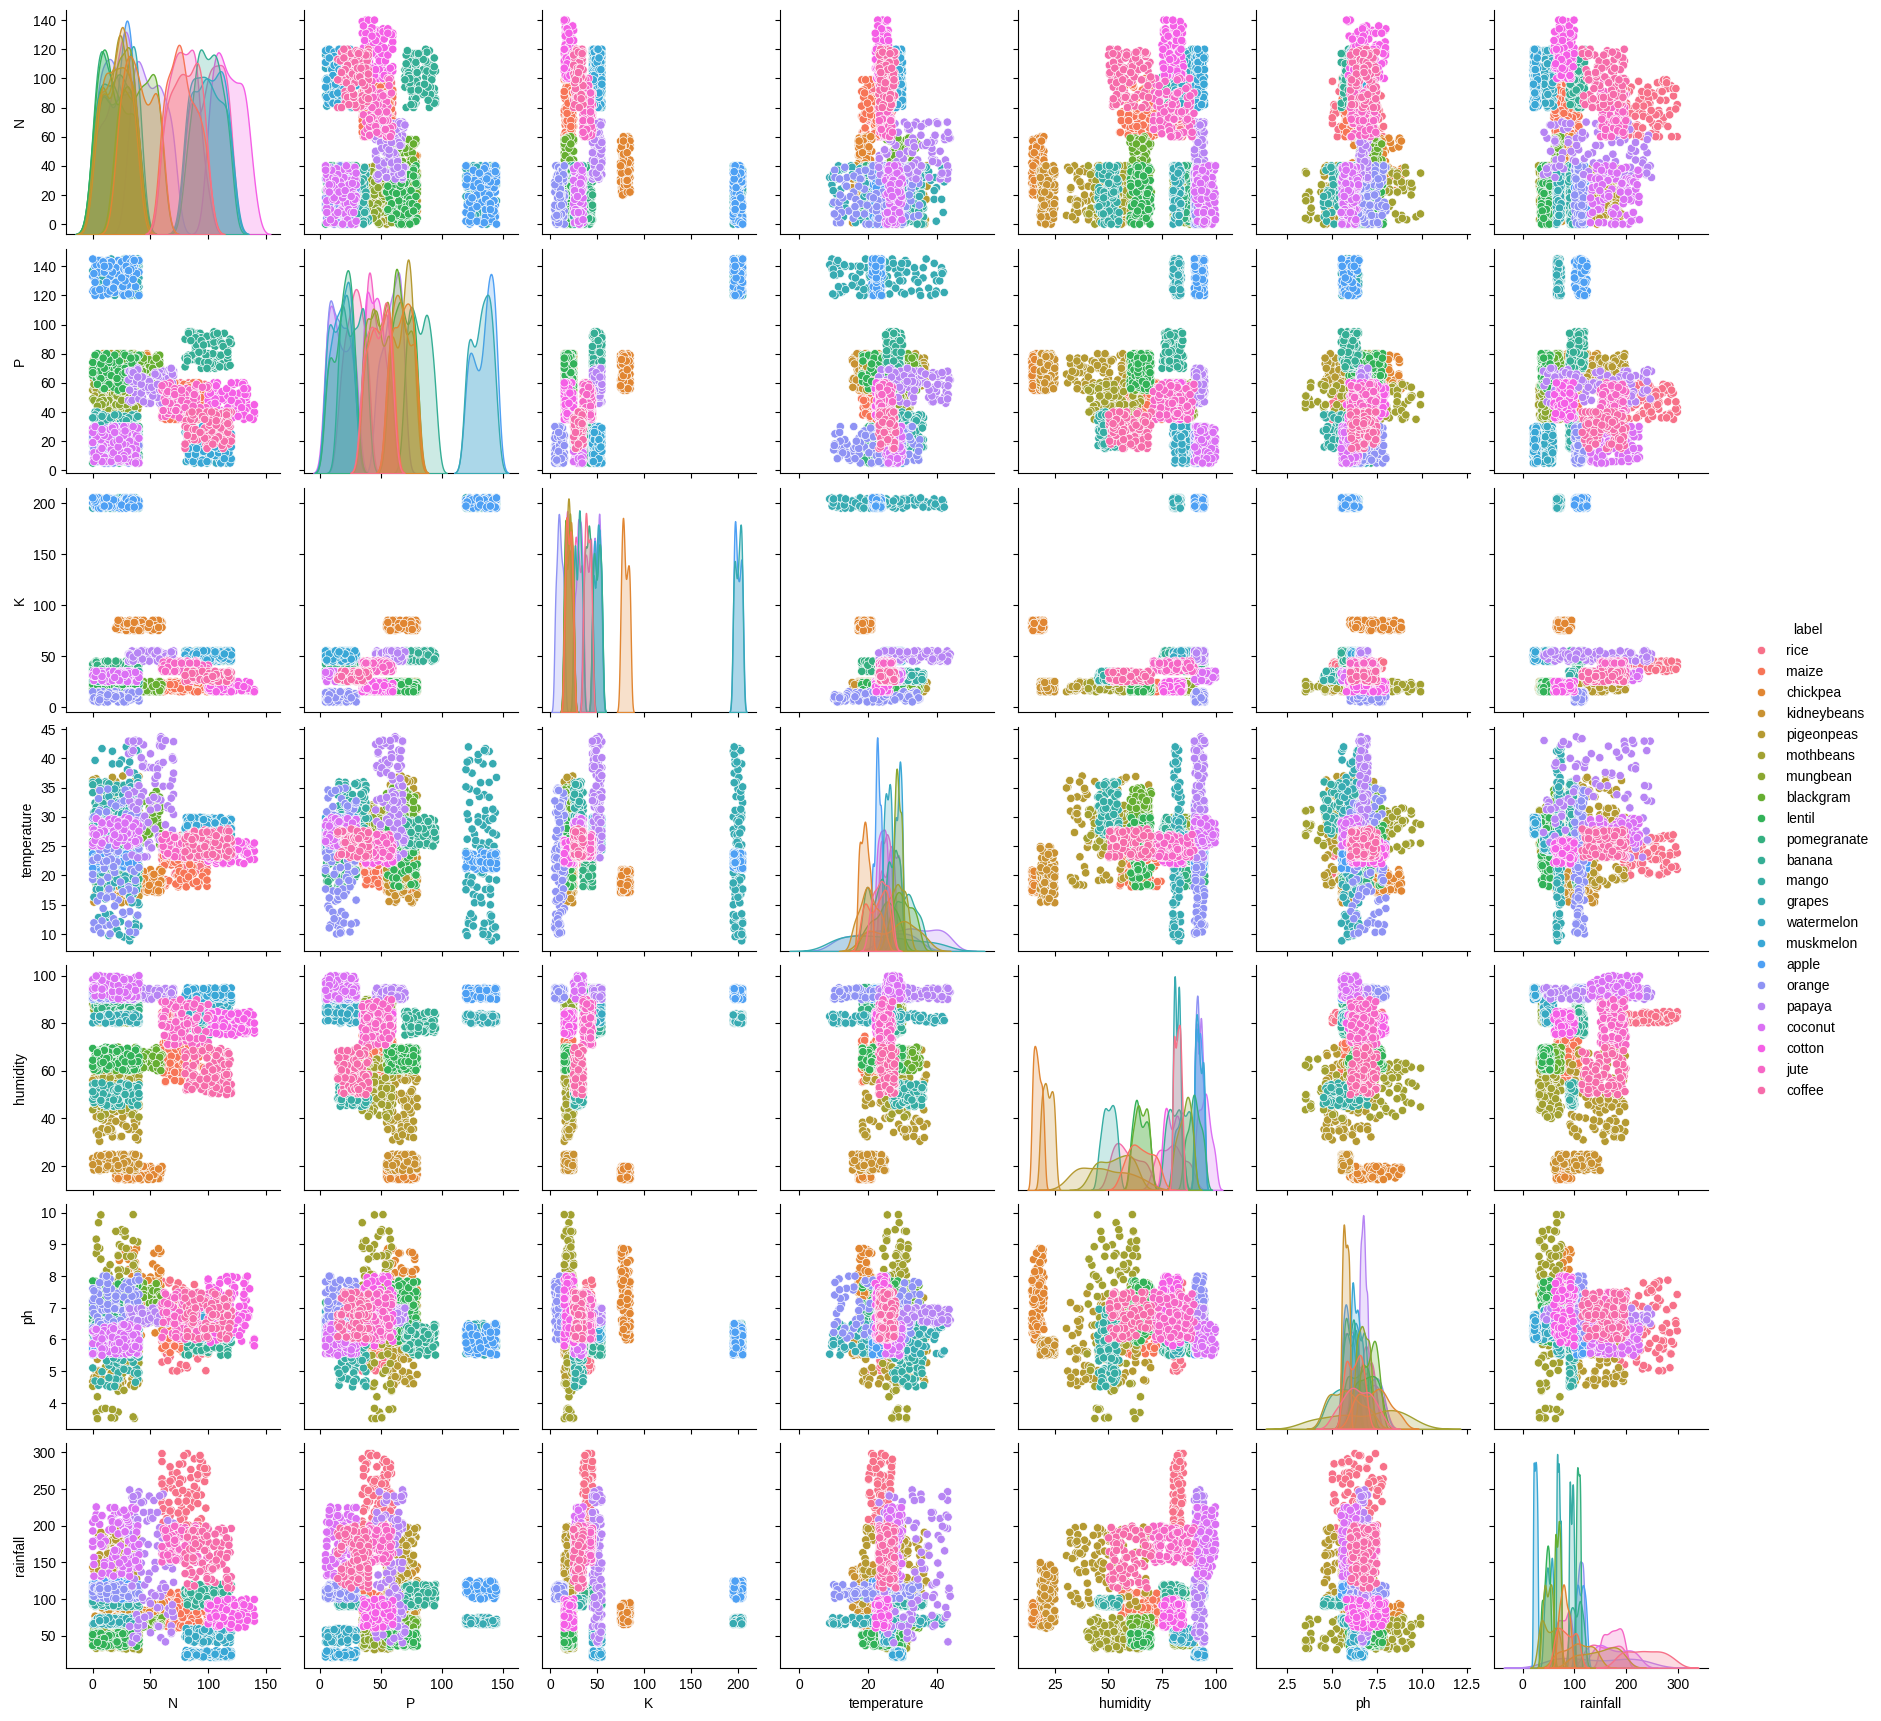

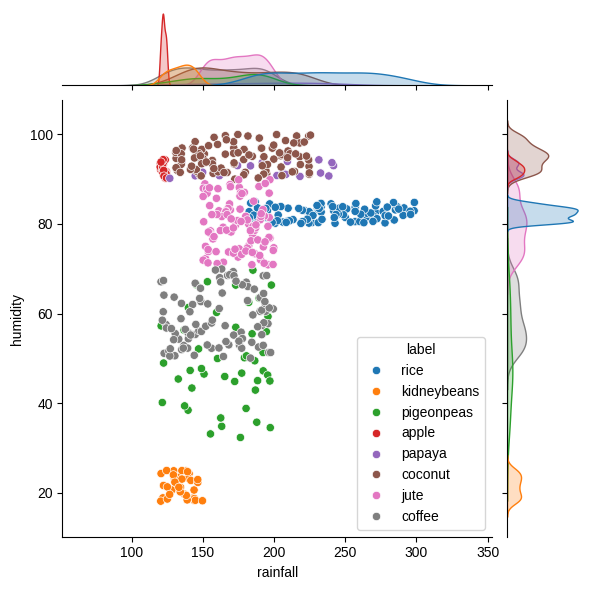

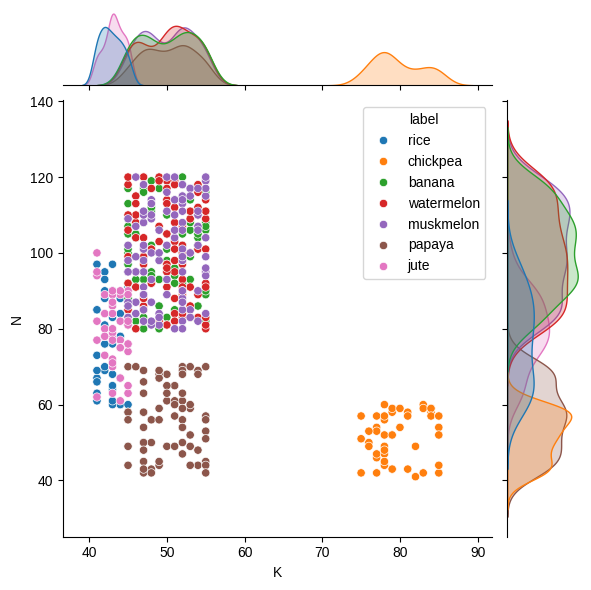

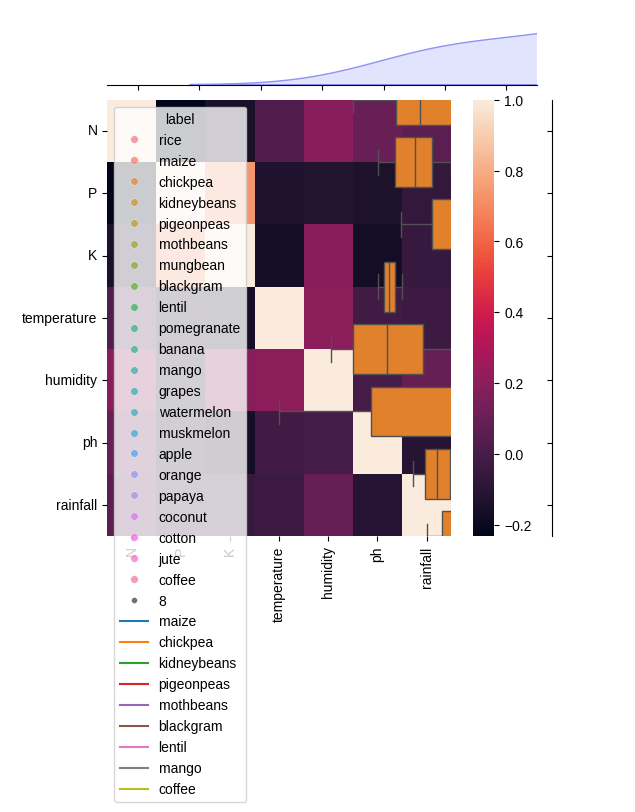

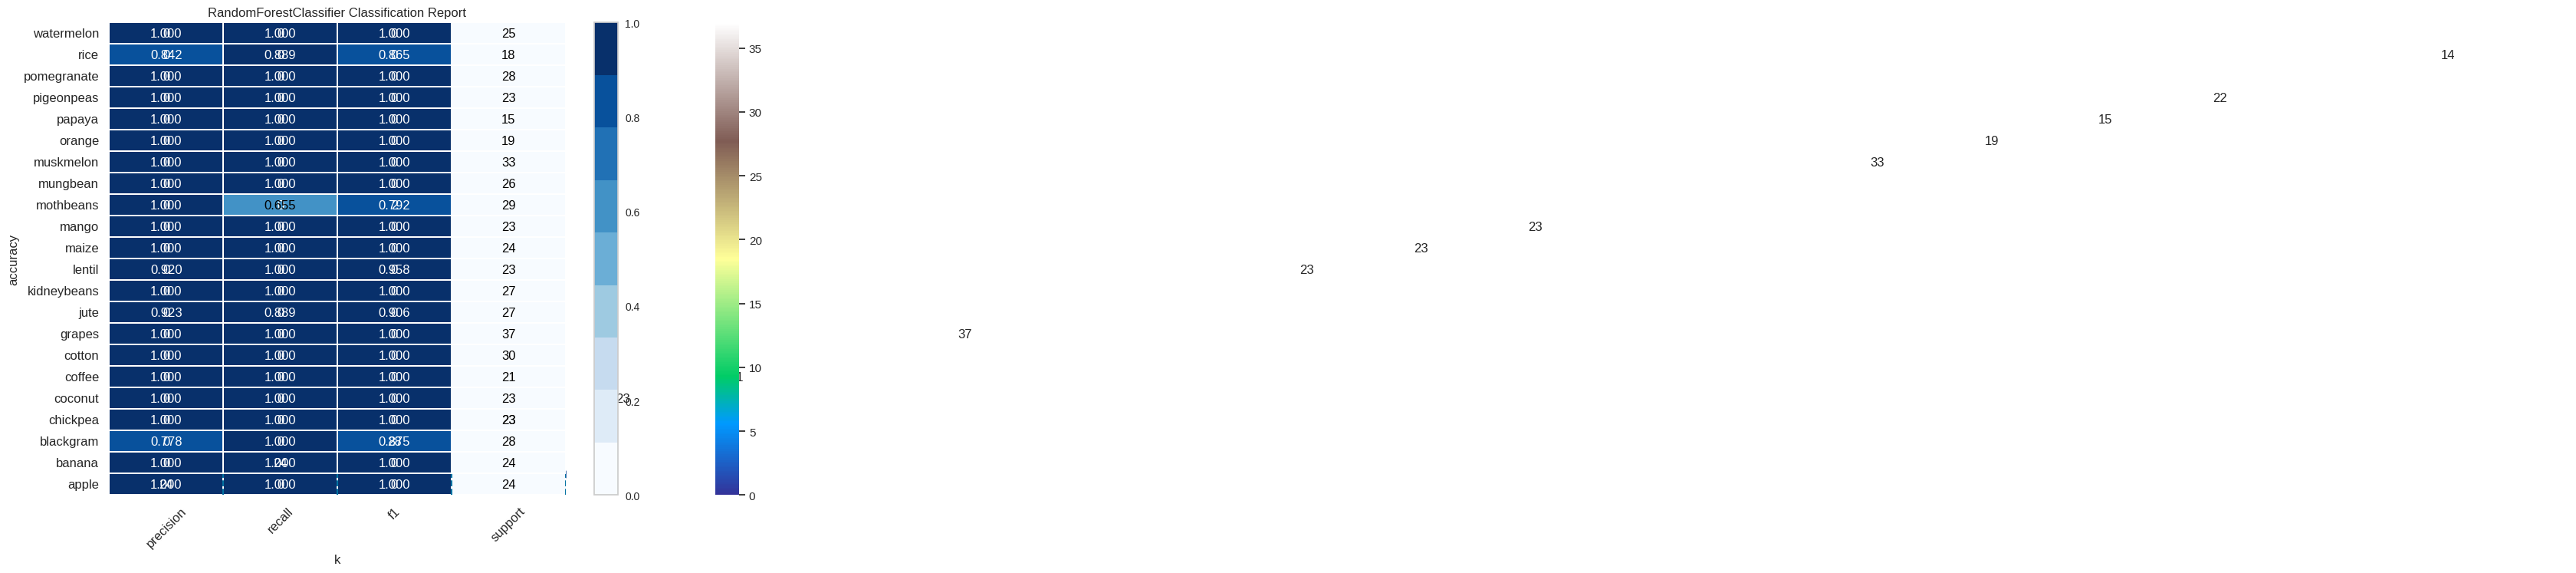

Gradient Boosting accuracy : 0.9963636363636363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 7
[LightGBM] [Info] Start training from score -3.077797
[LightGBM] [Info] Start training from score -3.077797
[LightGBM] [Info] Start training from score -3.131864
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.039083
[LightGBM] [Info] Start training from score -3.160035
[LightGBM] [Info] Start training from score -3.265396
[LightGBM] [Info] Start training from score -3.118071
[LightGBM] [Info] Start training from score -3.118071
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.077797
[LightGBM] [Info]

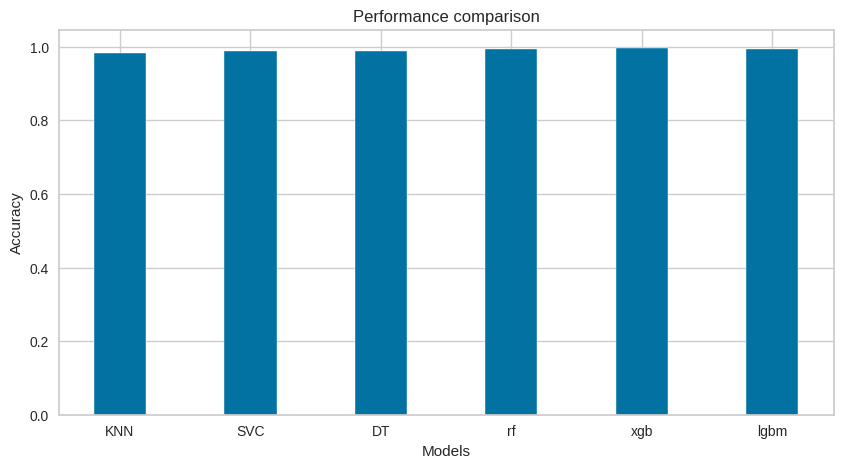

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 7
[LightGBM] [Info] Start training from score -3.077797
[LightGBM] [Info] Start training from score -3.077797
[LightGBM] [Info] Start training from score -3.131864
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.039083
[LightGBM] [Info] Start training from score -3.160035
[LightGBM] [Info] Start training from score -3.265396
[LightGBM] [Info] Start training from score -3.118071
[LightGBM] [Info] Start training from score -3.118071
[LightGBM] [Info] Start training from score -3.064725
[LightGBM] [Info] Start training from score -3.077797
[

array([0.99090909, 0.99545455, 0.99545455, 0.99090909, 1.        ,
       0.99545455, 0.99545455, 0.99545455, 0.99090909, 1.        ])

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O >>Crop_recommendation.csv


import os
for dirname, _, filenames in os.walk('../docs/Crop_recommendation.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
## %matplotlib inline
df=pd.read_csv('../docs/Crop_recommendation.csv')
df.head()
df.describe()
df.shape
df['label'].value_counts()
df.isnull().sum()
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})
sns.countplot(y='label',data=df, palette="plasma_r")
sns.pairplot(df, hue = 'label')
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)
sns.boxplot(y='label',x='ph',data=df)
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")


#DATA DECLARATION
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())

#FEATURE SCALING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV

#MODEL SELECTION

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

s1 = model.best_score_

model.best_params_

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

s2 = svc_poly.score(X_test_scaled,y_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

print(model.best_score_ )
print(model.best_params_ )

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
s3 = dt.score(X_test,y_test)

'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

parameters = {'max_depth': [2,3,4,5,6,7,8,9,10] , 'n_estimators': list(range(10,200,10))}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

model.best_score_

model.best_params_

rf1 = RandomForestClassifier(max_depth=10,n_estimators=60,random_state=42).fit(X_train, y_train)

rf1.score(X_test,y_test)

rf2 = RandomForestClassifier(max_depth=9,n_estimators=100,random_state=42).fit(X_train, y_train)
s4 = rf2.score(X_test,y_test)

from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

s5 = grad.score(X_test,y_test)

import lightgbm as lgb


model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

s6 = model.score(X_test,y_test)

import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (10, 5))
plt.bar(["KNN","SVC","DT",'rf','xgb','lgbm'],[s1,s2,s3,s4,s5,s6], width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Performance comparison")
plt.show()

from sklearn.ensemble import VotingClassifier

m1 = KNeighborsClassifier(n_neighbors=1)
svc_poly = SVC(kernel = 'poly')
dt = DecisionTreeClassifier(random_state=42)
clf = RandomForestClassifier(max_depth=9,n_estimators=100)
lgbm = lgb.LGBMClassifier()

# model_1 = LogisticRegression()
# model_2 = XGBClassifier()
# model_3 = RandomForestClassifier()

grad2 = GradientBoostingClassifier().fit(X_train, y_train)
 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('xgb1', grad),("rf",clf),("lgbm",lgbm)], voting='hard')

# # predicting the output on the test dataset
# pred_final = final_model.predict(X_test)
 

# training all the model on the train dataset

from sklearn.metrics import log_loss
final_model.fit(X_train, y_train)

# printing log loss between actual and predicted value
final_model.score(X_test,y_test)

y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

fm = VotingClassifier(
    estimators=[('xgb1', grad),("rf",clf),("lgbm",lgbm)], voting='soft')

fm.fit(X_train,y_train)

fm.score(X_test,y_test)
from sklearn.metrics import confusion_matrix

y_pred = fm.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

fm = VotingClassifier(
    estimators=[('xgb1', grad),("rf",clf),("lgbm",lgbm)], voting='soft')

from sklearn.model_selection import cross_val_score
scores = cross_val_score(fm,X,y,cv=10)

scores.mean()*100

scores